# Visualizations for Cafe Sales Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Load cleaned dataset
df = pd.read_csv("completely_cleaned_cafe_sales.csv")


In [2]:
# Dataset overview
print(df.head())
print("\nData Types:")
print(df.dtypes)


  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0     4.000000   
1    TXN_4977031    Cake       4.0             3.0    12.000000   
2    TXN_4271903  Cookie       4.0             1.0     8.924352   
3    TXN_7034554   Salad       2.0             5.0    10.000000   
4    TXN_3160411  Coffee       2.0             2.0     4.000000   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-store       2023-05-16  
2     Credit Card  In-store       2023-07-19  
3  Digital Wallet  Takeaway       2023-04-27  
4  Digital Wallet  In-store       2023-06-11  

Data Types:
Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object


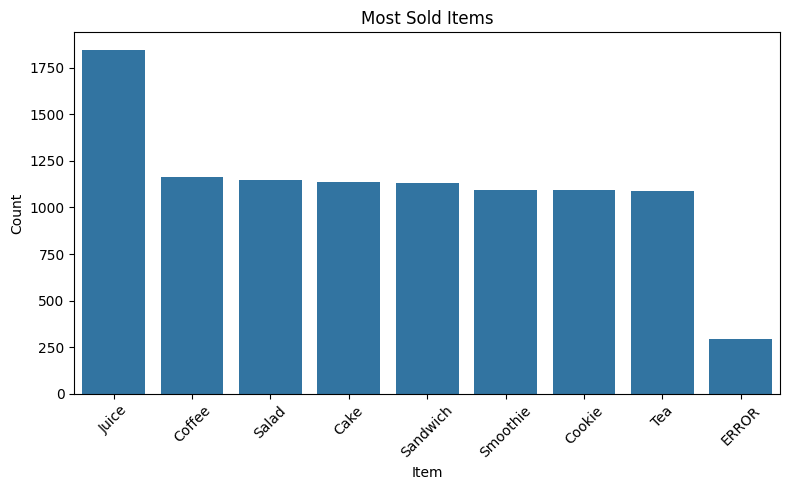

In [3]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Item', order=df['Item'].value_counts().index)
plt.title('Most Sold Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


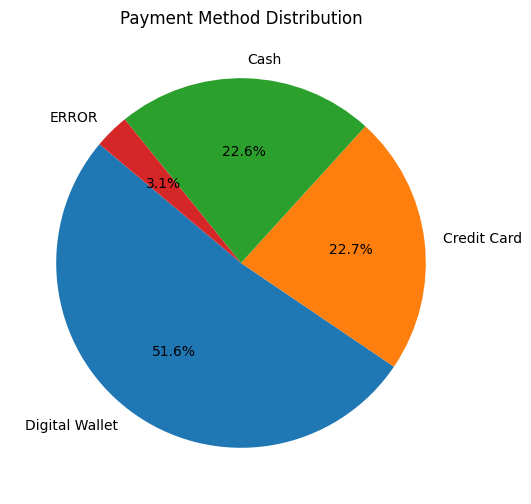

In [4]:
plt.figure(figsize=(6,6))
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


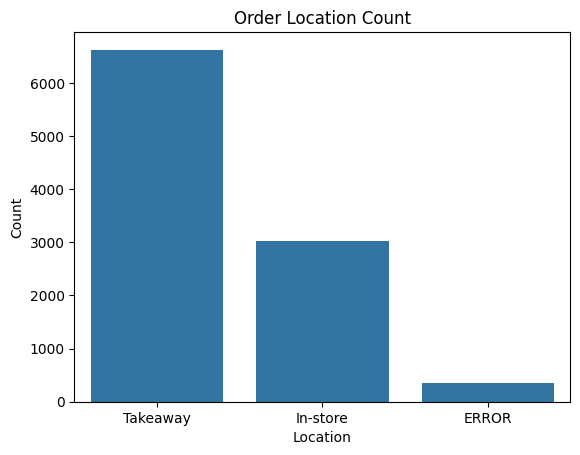

In [5]:
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title('Order Location Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


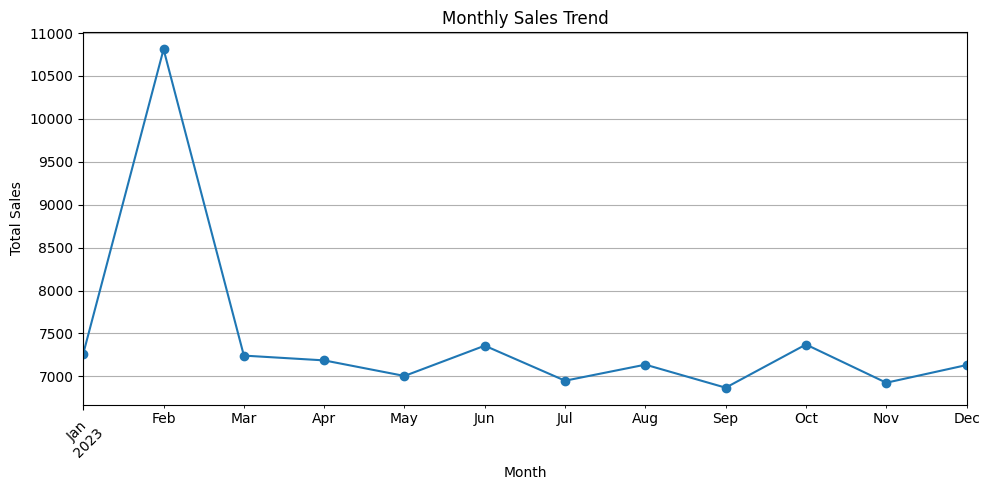

In [6]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Spent'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


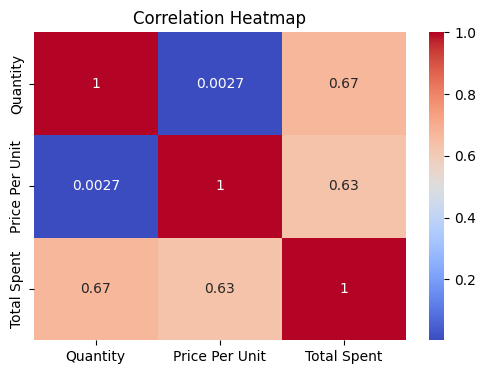

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'Price Per Unit', 'Total Spent']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
